---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importamos una función que permite separar un dataset en dos datasets distintos a modo de crear una dataset 
# de entrenamiento y otro de evaluación a partir de un solo dataset.
from sklearn.model_selection import train_test_split

# Importamos el dataset que son una serie de datos tabulados:
fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

# Otra forma sería con read_csv pero indicando un sep='\tab'
fruits1=pd.read_csv('readonly/fruit_data_with_colors.txt', sep='\t')

In [2]:
fruits.head()
fruits1.head()

# Ambas matrices son iguales
# fruits==fruits1

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# Se puede ver que la tabla tiene un fruit_label que es un nro que identifica a cada fruta y fue generado por el 
# creador del dataset, además tiene atributos como la masa, ancho, altura y color (0-1)

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Create train-test split

In [5]:
# Vamos a generar las matrices de entrenamiento y evaluación del clasificador:

# Antes que nada separamos los labels de los atributos de cada fruta
# 1- Definimos una matriz con los atributos de las frutas
X = fruits[['mass', 'width', 'height']]
# 2- Definimos otra matriz con el código de las frutas
y = fruits['fruit_label']

# Ahora utilizamos la función de sklearn llamada "train_test_split" para seleccionar datos al azar y generar matrices de
# entrenamiento y evaluación del clasificador
# La misma genera 4 matrices: dos con el 75% de los datos para entrenar y otras dos con el 25% de los datos para evaluar
# Estos valores por defecto de 75%/25% pueden cambiarse
# random_state=0 indica que se genera un random con un seed=0
# con test_size= se puede cambiar el tamaño de la matriz de test y por ende de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Como resultado se obtiene algo como lo ejemplificado abajo ↓
# Train contiene el 75% de los datos/filas de la df original
# y_train contiene los id y labels de las frutas
# X_train contiene los atributos de las frutas

In [6]:
# Podemos ver que X_train es 3 veces más grande que X_test (75%:25%)
len(X_train)/len(X_test)

2.933333333333333

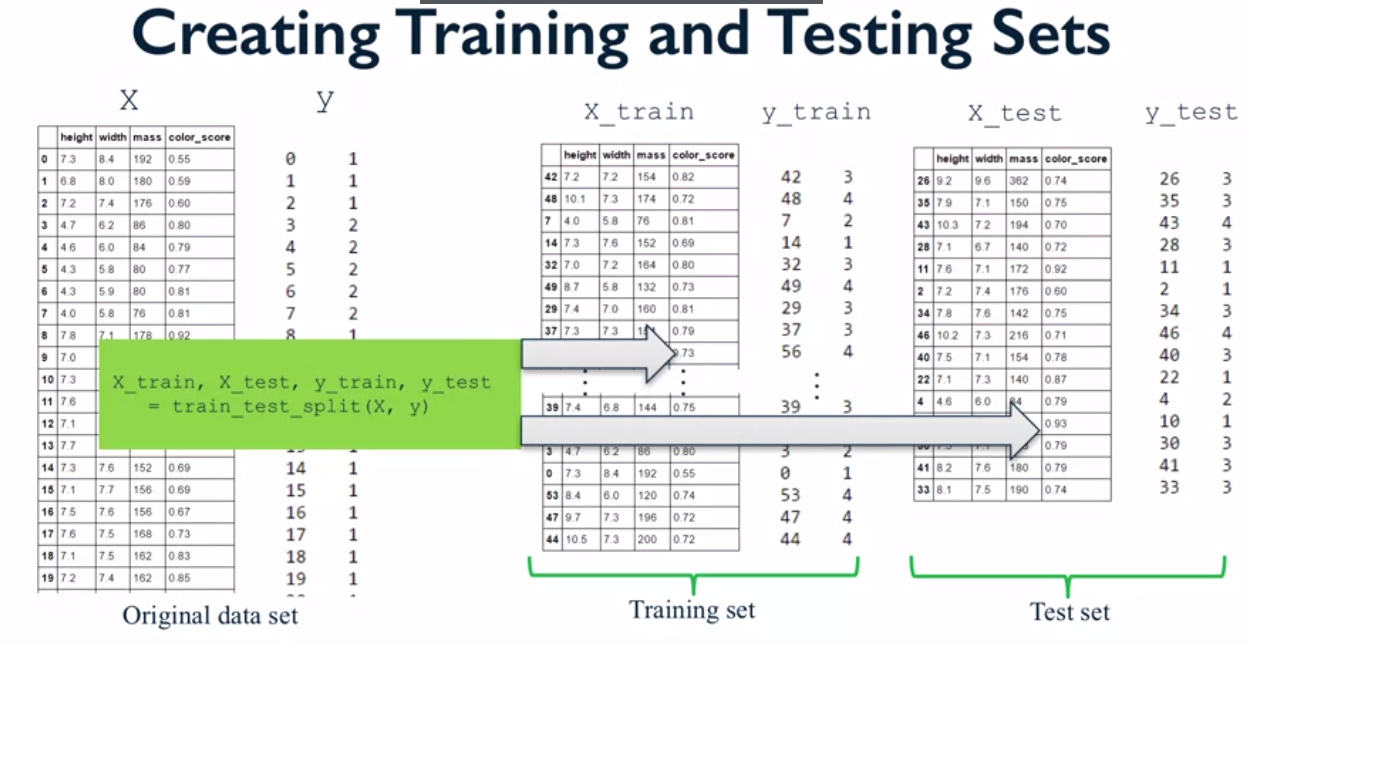

### Examining the data

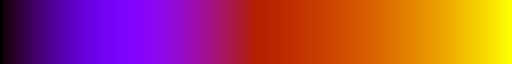

In [7]:
# Vamos a explorar la data de la df de entrenamiento = X_train que contiene los "features"/atributos de cada fruta/objeto

# plotting a scatter matrix
from matplotlib import cm

# Generamos un color map
cmap = cm.get_cmap('gnuplot')# genera un color map de colores de 0 (violeta) a 1 (rojo)
cmap
# Vemos el color map ↓

<IPython.core.display.Javascript object>


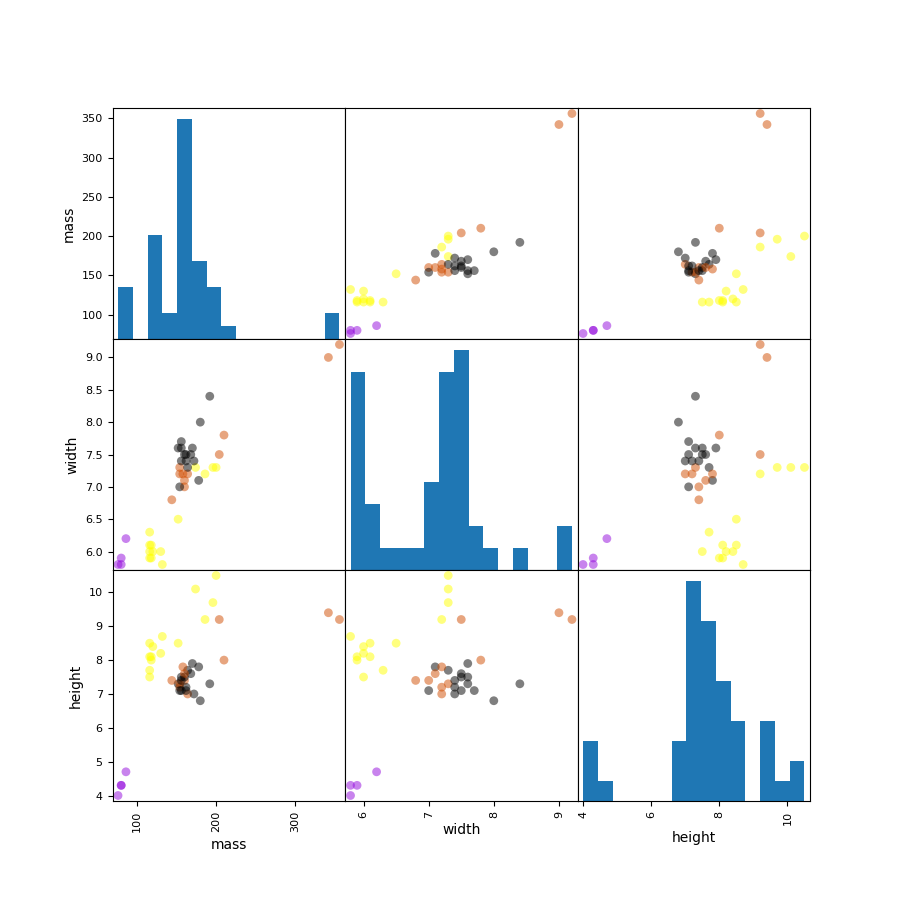

In [8]:
# Hacemos un scatter plot con los colores de las frutas asignados en sus atributos "color_score"
# Podemos ver la relación entre pares de features

scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

# Detalles scatter_matrix:
# X_train es la df a partir de la cual extrae las features y las compara de a pares
# c= define el color de los objetos según su label=nr0 1-5
# marker define cómo se gráfica cada punto
# hist= define el nro de bins del histograma
# cmap= es el color a usarse de acuerdo al valor definido en c= y_train

<IPython.core.display.Javascript object>


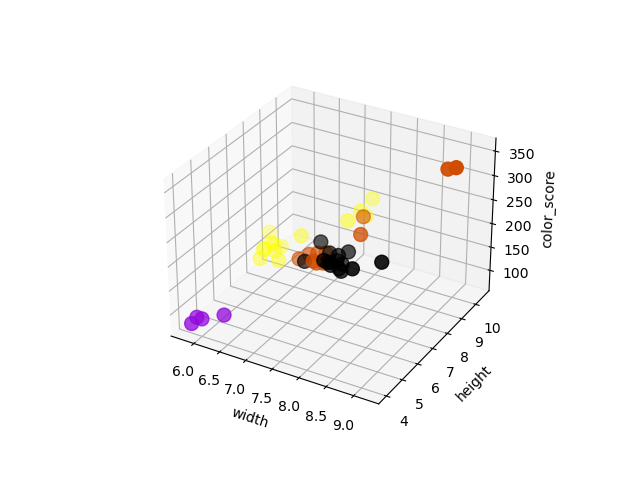

In [9]:
# Hacemos un gráfico 3D de los atributos contenidos en X_train: height, width y color_score
# plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['mass'], c = y_train, marker = 'o', s=100, cmap=cmap)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

####
# Es interactivo y se puede mover con el mouse

### Create classifier object

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
type(y_train)

pandas.core.series.Series

### Estimate the accuracy of the classifier on future data, using the test data

In [13]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [14]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [15]:
# knn.predict() devuelve un objeto del tipo array
fruit_prediction

array([2], dtype=int64)

In [16]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

### Plot the decision boundaries of the k-NN classifier

In [17]:
#%% Function done by FEFe
#%% Lets define a function no generate KNN boundaries graphs according to different k/neighbors values

def plot_fruit_knn(X, y, n_neighbors=5, weights='uniform'):
    
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.neighbors import KNeighborsClassifier
    from matplotlib.colors import ListedColormap
    import matplotlib.patches as mpatches
    
    X_mat = X[['height', 'width']]
    y_mat = y
    
    # We create the classifier and define K and type of weight:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat['height'].min() - 1, X_mat['height'].max() + 1
    y_min, y_max = X_mat['width'].min() - 1, X_mat['width'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat['height'], X_mat['width'], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.title('K-NN decision boundaries with K= {}'.format(n_neighbors))
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


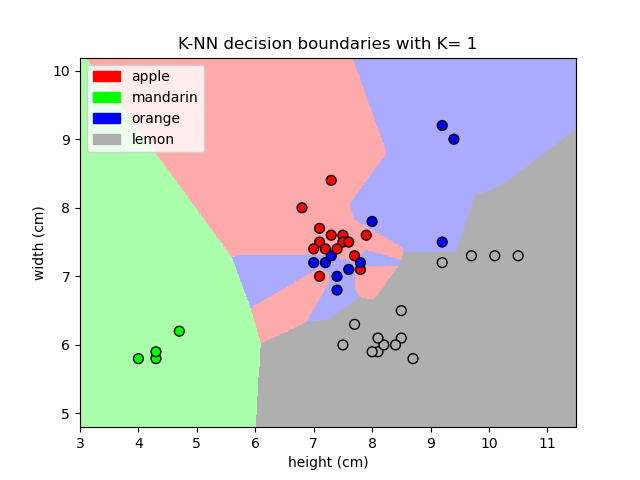

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


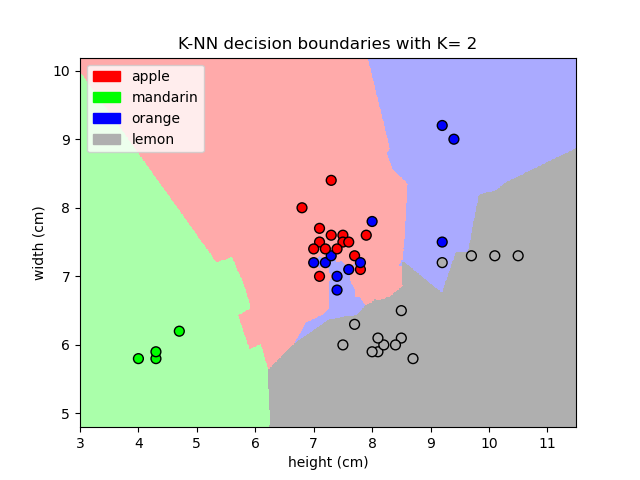

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


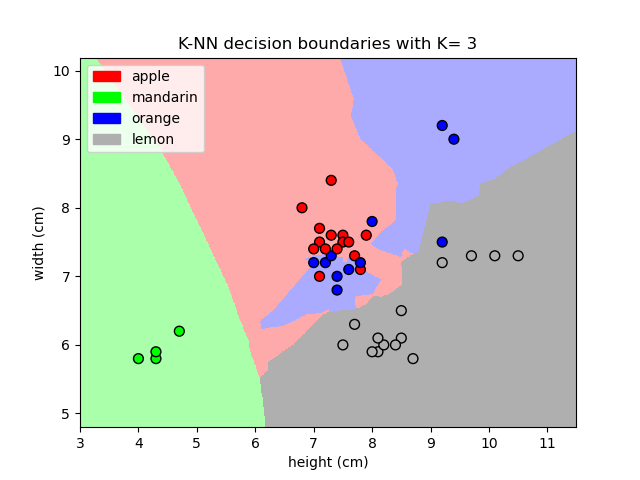

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


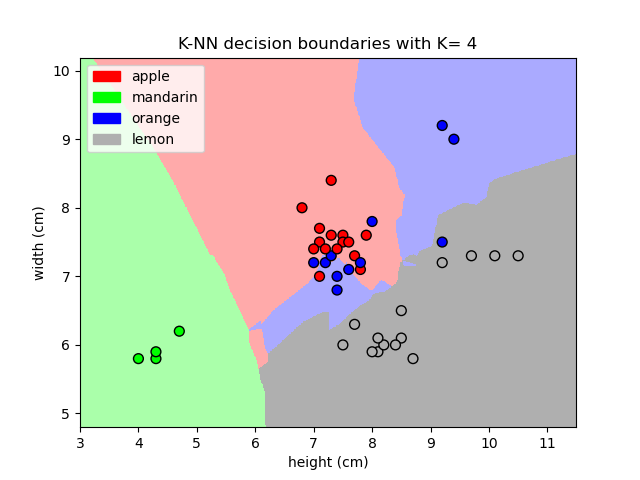

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


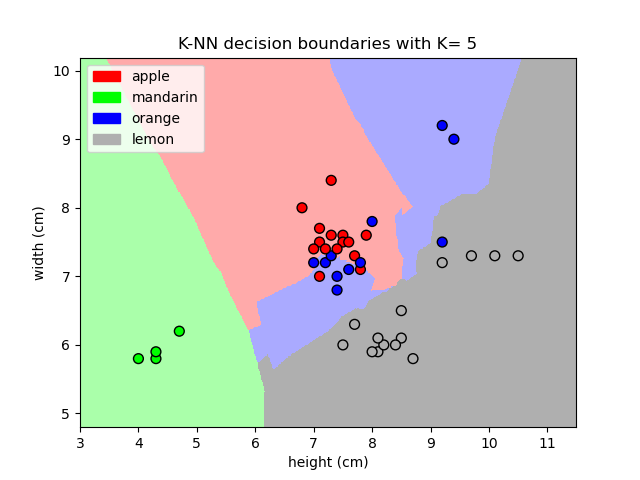

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>


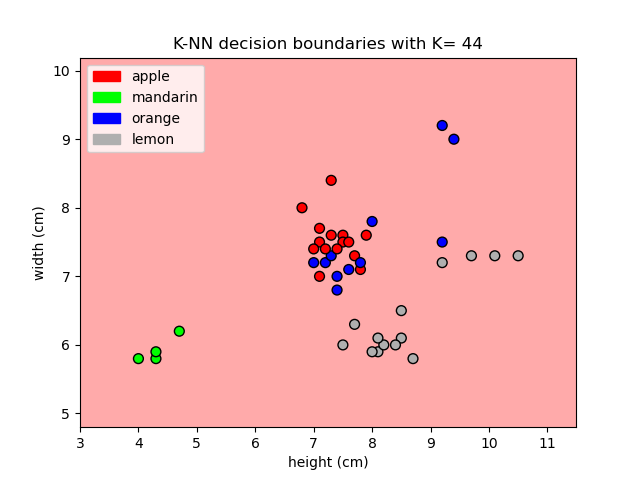

In [18]:
# Lets make different boundary graphs using different K values:

k = [1,2,3,4,5,len(y_train)]
for i in k:
    plot_fruit_knn(X_train, y_train, i, 'uniform')

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


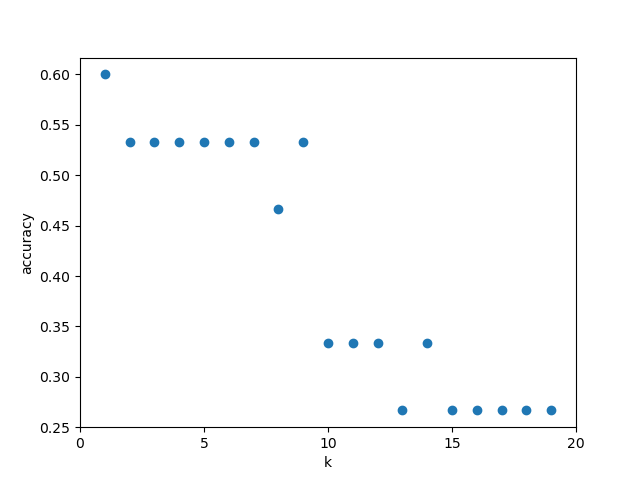

In [20]:
# Acá vamos a comparar los scores o eficacia del clasificador para distintos valores de K
# para ello vamos a ver cuán exactos son los labels predichos por el clasifier con respecto a los anotados en 
# el training set.

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [ ]:
# Se observa que para K=1 hay mayor exactitud pero es muy susceptible a outlayers!!
# A medida que aumenta K mejora la robustez pero se pierde exactitud.

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


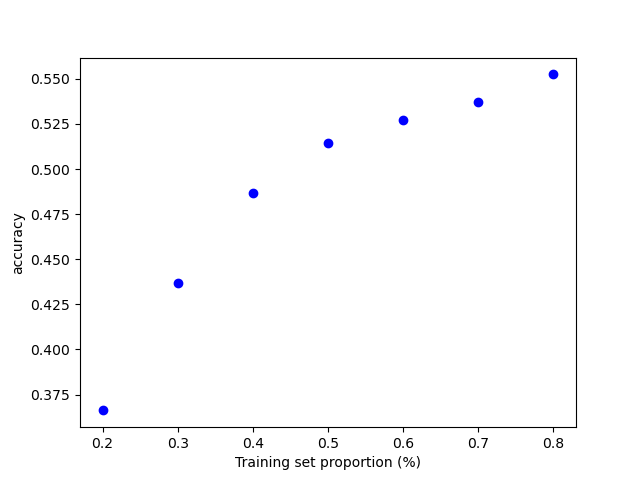

In [21]:
# Vamos a ver cómo el tamaño del training set afecta a la eficacia del clasificador al momento de asignar labels.

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [ ]:
# Se puede ver que a medida que aumenta el tamaño del training_set mejora la exactitud del clasificador,
# aunque es una fn ln() que eventualmente llega a un límite por más que siga creciendo el training set.